# Chapter 2 - Multiple regression

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#2.2.4-Simulation-with-Multiple-Explanatory-Variables" data-toc-modified-id="2.2.4-Simulation-with-Multiple-Explanatory-Variables-1">2.2.4 Simulation with Multiple Explanatory Variables</a></span></li><li><span><a href="#2.2.5-Matrix-algebra-of-Short-Regression" data-toc-modified-id="2.2.5-Matrix-algebra-of-Short-Regression-2">2.2.5 Matrix algebra of Short Regression</a></span></li><li><span><a href="#2.3.2-Understand-multicollinearity-with-Python" data-toc-modified-id="2.3.2-Understand-multicollinearity-with-Python-3">2.3.2 Understand multicollinearity with Python</a></span></li><li><span><a href="#2.4.2-NLSM-data" data-toc-modified-id="2.4.2-NLSM-data-4">2.4.2 NLSM data</a></span></li><li><span><a href="#2.4.3-OLS-estimates-of-returns-to-schooling" data-toc-modified-id="2.4.3-OLS-estimates-of-returns-to-schooling-5">2.4.3 OLS estimates of returns to schooling</a></span></li><li><span><a href="#2.5.2-Simulation-of-Dual-Path-Model" data-toc-modified-id="2.5.2-Simulation-of-Dual-Path-Model-6">2.5.2 Simulation of Dual Path Model</a></span></li><li><span><a href="#2.5.3-Dual-path-estimator-versus-long-regression" data-toc-modified-id="2.5.3-Dual-path-estimator-versus-long-regression-7">2.5.3 Dual path estimator versus long regression</a></span></li></ul></div>

## 2.2.4 Simulation with Multiple Explanatory Variables

In [2]:
# as in chapter 1, we use numpy
import numpy as np

In [3]:
# remove Python warnings
import warnings
warnings.filterwarnings("ignore")

We generate the data using a custom function, which allows to change the alpha parameter easily and avoid repetitions in code.

In [4]:
np.random.seed(123456789)
    
N = 1000
a = 2
b = 3
c = 4

# create a vector where the observed characteristic, x, is drawn 
# from a uniform distribution
u_x = np.random.normal(size = N)

# create a vector for the unobserved characteristic, u, from
# a standard normal distribution
u = np.random.normal(size = N)

In [5]:
def generate_data(alpha):
    """
    * x and w are two random vectors
    * alpha is the common factor affecting both x and y
    * u is a vector for the unobserved characteristic, drawn from a standard normal distribution
    * y = a + b*x + c*w + u
    """
    
    # we generate two random vectors
    x = (1-alpha) * np.random.rand(N) + alpha * u_x
    w = (1-alpha) * np.random.rand(N) + alpha * u_x

    # create a vector y
    y = a + b*x + c*w + u
    
    return x, w, y, u

We now perform the regressions:

In [6]:
# using statsmodels and pandas
import statsmodels.formula.api as sm
from statsmodels.iolib.summary2 import summary_col
import pandas as pd

# independant variables
x, w, y, u = generate_data(alpha=0)
df = pd.DataFrame({'y': y, 'x': x, 'w':w})
reg1 = sm.ols(formula="y ~ x", data=df).fit()
reg2 = sm.ols(formula="y ~ x + w", data=df).fit()

# we show the data generated in this case
print('Data generated in the case where alpha = 0:')
display(df.head())

# slightly dependant variables
x, w, y, u = generate_data(alpha=0.5)
df = pd.DataFrame({'y': y, 'x': x, 'w':w})
reg3 = sm.ols(formula="y ~ x", data=df).fit()
reg4 = sm.ols(formula="y ~ x + w", data=df).fit()

# highly dependant variables
x, w, y, u = generate_data(alpha=0.95)
df = pd.DataFrame({'y': y, 'x': x, 'w':w})
reg5 = sm.ols(formula="y ~ x", data=df).fit()
reg6 = sm.ols(formula="y ~ x + w", data=df).fit()

Data generated in the case where alpha = 0:


,y,x,w
0,7.470321,0.582073,0.823888
1,7.001981,0.675397,0.707480
2,2.837512,0.302488,0.139083
3,3.720985,0.361286,0.079521
4,6.084485,0.376386,0.898978


And we display the results in a summary table:

In [7]:
print(summary_col([reg1,reg2,reg3,reg4,reg5,reg6],
                  stars=True,
                  float_format='%0.2f',
                  model_names=['(1)','(2)','(3)','(4)','(5)','(6)'],
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.2f}".format(x.rsquared)}
            ))


            (1)     (2)     (3)     (4)     (5)     (6)  
---------------------------------------------------------
Intercept 4.05*** 1.97*** 2.06*** 1.97*** 2.00*** 2.00***
          (0.10)  (0.09)  (0.05)  (0.04)  (0.03)  (0.03) 
R-squared 0.22    0.66    0.88    0.92    0.98    0.98   
          0.23    0.66    0.88    0.92    0.98    0.98   
w                 4.05***         3.88***         5.08***
                  (0.11)          (0.16)          (1.61) 
x         2.90*** 3.00*** 6.76*** 3.23*** 7.06*** 1.98   
          (0.17)  (0.11)  (0.08)  (0.16)  (0.04)  (1.61) 
N         1000    1000    1000    1000    1000    1000   
R2        0.23    0.66    0.88    0.92    0.98    0.98   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


**Other libraries:**

* There is also now `Stargazer` for Python, in order to have publication ready statistical tables written direclty in $\LaTeX$: https://github.com/mwburke/stargazer/

* As regards `Sklearn`, there are no statistical/R like regression reports, because it is a library focusing mostly on machine learning for prediction (rather than inference)

## 2.2.5 Matrix algebra of Short Regression

In [8]:
x1, w1, y1, u = generate_data(alpha=0)
x2, w2, y2, u = generate_data(alpha=0.5)
print('cov(x1, y1)=',np.cov(x1, w1)[0][1])
print('cov(x2, y2)=',np.cov(x2, w2)[0][1])
# in numpy, np.cov returns a matrix whose 1st element is cov(a,b)

cov(x1, y1)= -0.0019642263218963584
cov(x2, y2)= 0.2369600587922648


In [9]:
# np.dot for matrix multiplication in Python
# X.T to transpose the matrix X
np.dot(x2.T,w2)

292.38417829186983

## 2.3.2 Understand multicollinearity with Python

In [10]:
from numpy.linalg import inv
from numpy.linalg import solve

x3, w3, y3, u = generate_data(alpha=0.95)

X2 = pd.DataFrame({'': 1, 'x3': x3, 'w3':w3})

solution = solve(a= X2.T.dot(X2), b = inv(X2.T.dot(X2))).dot(X2.T).dot(u)

print(solution)
print('u =',np.mean(u))
print('cov(x3,u) =',np.cov(x3,u)[0][1])
print('cov(w3,u) =',np.cov(w3,u)[0][1])

[  0.0116687   10.96966977 -10.9596755 ]
u = -0.002643049742088632
cov(x3,u) = 0.049929881344282855
cov(w3,u) = 0.04902303628054247


In [11]:
print((1/N)*X2.T.dot(u))

     -0.002643
x3    0.049855
w3    0.048946
dtype: float64


In [12]:
# get the reciprocal determinant of the matrix
1/np.linalg.det(X2.T.dot(X2))

2.8434330942932345e-06

## 2.4.2 NLSM data

In [13]:
x = pd.read_csv('../data/nls.csv')
x.head()

,id,nearc2,nearc4,nearc4a,nearc4b,ed76,ed66,age76,daded,nodaded,...,noint80,enroll76,enroll78,enroll80,kww,iq,marsta76,marsta78,marsta80,libcrd14
0,2,0,0,0,0,7,5,29,9.94,1,...,0,0,0,0,15,.,1,1,1,0
1,3,0,0,0,0,12,11,27,8.00,0,...,0,0,0,0,35,93,1,4,4,1
2,4,0,0,0,0,12,12,34,14.00,0,...,1,0,.,.,42,103,1,.,.,1
3,5,1,1,1,0,11,11,27,11.00,0,...,0,0,.,0,25,88,1,.,5,1
4,6,1,1,1,0,12,12,34,8.00,0,...,1,0,0,.,34,108,1,1,.,0


In [14]:
# We define a bunch of functions to clean the data
# in an organised fashion

def convert_col_to_numeric(df, col):
    df[col] = pd.to_numeric(df[col], errors = 'coerce')
    return df

def remove_missing(df, col):
    condition = df[col].isna() == False
    return df[condition]

def get_working_years_after_school(df):
    """
    We create new variables:
    * exp: experience after school
    * exp2: experience squared divided by 100
    """
    df['exp'] = df['age76']-df['ed76']-6
    df['exp2'] = df['exp']**2/100 
    # in Python **2 means squared
    return df

In [15]:
# and we perform the data cleaning using the .pipe operator
# on the original dataset x

x1 = (
    x
    .pipe(convert_col_to_numeric, col = 'wage76')
    .pipe(convert_col_to_numeric, col = 'lwage76')
    .pipe(remove_missing, col = 'lwage76')
    .pipe(get_working_years_after_school)
)

## 2.4.3 OLS estimates of returns to schooling

In [16]:
lm1 = sm.ols(formula = "lwage76 ~ ed76", data=x1).fit()
lm2 = sm.ols(formula = "lwage76 ~ ed76 + exp + exp2", data=x1).fit()
lm3 = sm.ols(formula = "lwage76 ~ ed76 + exp + exp2 + black + reg76r", data=x1).fit()
lm4 = sm.ols(formula = "lwage76 ~ ed76 + exp + exp2 + black + reg76r + smsa76r + smsa66r + reg662 + reg663 + reg664 + reg665 + reg666 + reg667 + reg668 + reg669", data=x1).fit()

In [17]:
print(summary_col([lm1,lm2,lm3,lm4],
                  stars=True,
                  float_format='%0.4f',
                  model_names=['(1)','(2)','(3)','(4)'],
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.3f}".format(x.rsquared)}
            ))


             (1)       (2)        (3)        (4)    
----------------------------------------------------
Intercept 5.5709*** 4.4685***  4.7963***  4.6208*** 
          (0.0388)  (0.0687)   (0.0685)   (0.0742)  
R-squared 0.0984    0.1950     0.2639     0.2963    
          0.0987    0.1958     0.2651     0.2998    
black                          -0.1780*** -0.1990***
                               (0.0179)   (0.0182)  
ed76      0.0521*** 0.0932***  0.0782***  0.0747*** 
          (0.0029)  (0.0036)   (0.0035)   (0.0035)  
exp                 0.0898***  0.0851***  0.0848*** 
                    (0.0071)   (0.0068)   (0.0066)  
exp2                -0.2486*** -0.2340*** -0.2287***
                    (0.0338)   (0.0323)   (0.0317)  
reg662                                    0.0964*** 
                                          (0.0359)  
reg663                                    0.1445*** 
                                          (0.0351)  
reg664                                    0.0

## 2.5.2 Simulation of Dual Path Model

In [18]:
# generate random data

import random
np.random.seed(123456789)
# again, this is a numpy seed with does not prevent numbers from 
# being different from the ones generated in the book with R

N = 50
a = 1
b = 0
c = 3
d = 4

# creating a vector of 0s and 1s
x = np.round(np.random.rand(N))
u_w = np.random.rand(N)
w = d*x + u_w
u = np.random.normal(size = N)
y = a + b*x + c*w + u

In [19]:
data = pd.DataFrame({'y': y, 'x': x, 'w':w})
lm_short = sm.ols(formula = "y ~ x", data=data).fit()
lm_long = sm.ols(formula = "y ~ x + w", data=data).fit()

print(summary_col([lm_short,lm_long],
                  stars=True,
                  float_format='%0.4f',
                  model_names=['(1)','(2)'],
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.3f}".format(x.rsquared)}
            ))


             (1)        (2)   
------------------------------
Intercept 2.0010***  1.0523***
          (0.2805)   (0.2931) 
R-squared 0.9615     0.9748   
          0.9623     0.9758   
w                    2.5172***
                     (0.4918) 
x         12.6761*** 2.2848   
          (0.3621)   (2.0512) 
N         50         50       
R2        0.962      0.976    
Standard errors in
parentheses.
* p<.1, ** p<.05, ***p<.01


In [20]:
e_hat = sm.ols(formula = "y ~ x", data=data).fit().params['x']
c_hat = sm.ols(formula = "y ~ w", data=data).fit().params['w']
d_hat = sm.ols(formula = "w ~ x", data=data).fit().params['x']

# estimate of b
e_hat - c_hat*d_hat

0.04668582105119512

## 2.5.3 Dual path estimator versus long regression

In [21]:
rows = []

for i in range(0,100):
    
    # generate random data
    x = np.round(np.random.rand(N))
    u_w = np.random.rand(N)
    w = d*x + u_w
    u = np.random.normal(size = N)
    y = a + b*x + c*w + u
    # pack the variables in a dataframe
    data = pd.DataFrame({'y': y, 'x': x, 'w':w})
    # run a regression
    lm2_temp = sm.ols(formula = "y ~ x + w", data=data).fit()
    # coefficient of x
    x = lm2_temp.params['x']
    # T-stat of the coefficient on x
    tt = lm2_temp.tvalues['x']
    # proposed estimator
    e_hat = sm.ols(formula = "y ~ x", data=data).fit().params['x']
    c_hat = sm.ols(formula = "y ~ w", data=data).fit().params['w']
    d_hat = sm.ols(formula = "w ~ x", data=data).fit().params['x']
    estimator = e_hat - c_hat*d_hat
    # store the values
    rows.append([x,tt, estimator])
    
df = pd.DataFrame(rows, columns=['Standard Est.', 'T-Stat of Standard', 'Proposed Est.'])

In [22]:
df.describe()

,Standard Est.,T-Stat of Standard,Proposed Est.
count,100.000000,100.000000,100.000000
mean,-0.027786,-0.002928,-0.000525
std,2.145449,1.084443,0.043137
min,-4.610712,-2.350682,-0.089071
25%,-1.564685,-0.789011,-0.029496
50%,-0.406267,-0.240068,-0.009528
75%,1.727499,0.881718,0.034190
max,4.419720,2.478646,0.091887


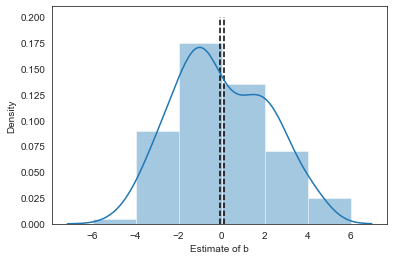

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
ax = sns.distplot(df['Standard Est.'],
                  bins=[-6,-4,-2,0,2,4,6])
ax.set(xlabel='Estimate of b')
plt.vlines(df['Proposed Est.'].min(),
           0,
           0.2,
           colors='k',
           linestyles='--',
           label='',
           data=None)
plt.vlines(df['Proposed Est.'].max(),
           0,
           0.2,
           colors='k',
           linestyles='--',
           label='',
           data=None)
plt.show()